In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('plotting.csv')
df = df.drop(['Unnamed: 0', 'tSNE1', 'tSNE2'], axis=1)
aug_df = df[df['sampling_bout']=='Aug_23']
jun_df = df[df['sampling_bout']=='Jun_23']
feb_df = df[df['sampling_bout']=='Feb_24']

# February

In [2]:
X = feb_df[['Longitude', 'Latitude', 'Surface_Temp', 'Bottom_Temp', 
          'Surface_Salinity', 'Bottom_Salinity', 'temp_strat', 'salt_strat']]
y = feb_df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42, 
                             bootstrap=True, max_depth= None, min_samples_leaf=1, min_samples_split=2
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
[[0 0 2]
 [0 1 3]
 [0 0 0]]

Accuracy Score: 0.16666666666666666


In [3]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# X = feb_df[['Longitude', 'Latitude', 'Surface_Temp', 'Bottom_Temp', 
#           'Surface_Salinity', 'Bottom_Salinity', 'temp_strat', 'salt_strat']]
# y = feb_df['cluster']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# param_grid = {
#     # 'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
# clf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)
# conf_matrix = confusion_matrix(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# print("Best Parameters:", grid_search.best_params_)
# print("\nConfusion Matrix:")
# print(conf_matrix)
# print("\nAccuracy Score:", accuracy)


# June

In [4]:
X = jun_df[['Longitude', 'Latitude', 'Surface_Temp', 'Bottom_Temp', 
          'Surface_Salinity', 'Bottom_Salinity', 'temp_strat', 'salt_strat']]
y = jun_df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
[[1 0 0 0 0]
 [0 1 1 0 0]
 [0 0 0 0 0]
 [1 1 0 0 0]
 [1 0 0 0 0]]

Accuracy Score: 0.3333333333333333


In [5]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# X = jun_df[['Longitude', 'Latitude', 'Surface_Temp', 'Bottom_Temp', 
#           'Surface_Salinity', 'Bottom_Salinity', 'temp_strat', 'salt_strat']]
# y = jun_df['cluster']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# param_grid = {
#     # 'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
# clf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)
# conf_matrix = confusion_matrix(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# # print("Best Parameters:", grid_search.best_params_)
# # print("\nConfusion Matrix:")
# # print(conf_matrix)
# # print("\nAccuracy Score:", accuracy)


# August

In [11]:
X = aug_df[['Surface_Temp', 'Bottom_Temp', 
          'Surface_Salinity', 'Bottom_Salinity', 'temp_strat', 'salt_strat']]
y = aug_df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=50, random_state=42,
                             bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5
                             )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
[[1 0 0 0]
 [0 1 1 0]
 [0 0 2 0]
 [0 0 1 0]]

Accuracy Score: 0.6666666666666666


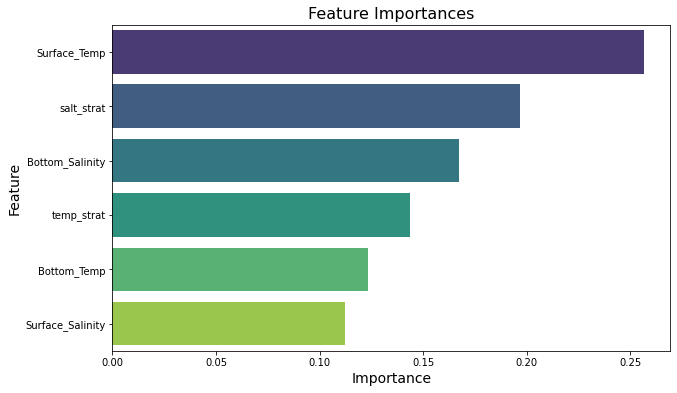

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.show()


In [7]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# X = aug_df[['Longitude', 'Latitude', 'Surface_Temp', 'Bottom_Temp', 
#           'Surface_Salinity', 'Bottom_Salinity', 'temp_strat', 'salt_strat']]
# y = aug_df['cluster']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
# clf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)
# conf_matrix = confusion_matrix(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# print("Best Parameters:", grid_search.best_params_)
# print("\nConfusion Matrix:")
# print(conf_matrix)
# print("\nAccuracy Score:", accuracy)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_

# Overall


In [8]:
dfc = pd.read_excel('cluster excel.xlsx')
dfc

,Unnamed: 0,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,...,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat,tSNE1,tSNE2,cluster,cluster_real
0,56,NJOT_Aug_23_100,NJOT,2023-08-01,Aug_23,edna,Trawl,100,B,1,...,23.452717,14.988620,31.562784,32.429375,8.464097,0.866592,3.190962,5.781725,1,1
1,57,NJOT_Aug_23_101,NJOT,2023-08-01,Aug_23,edna,Trawl,101,B,1,...,22.500439,16.974112,31.797065,32.248938,5.526328,0.451874,2.794010,5.067336,1,1
2,58,NJOT_Aug_23_102,NJOT,2023-08-01,Aug_23,edna,Trawl,102,B,1,...,23.541773,18.550107,29.348635,32.036490,4.991666,2.687855,2.964297,4.202396,1,1
3,59,NJOT_Aug_23_103,NJOT,2023-08-01,Aug_23,edna,Trawl,103,B,1,...,23.078181,13.831904,27.754786,32.357743,9.246277,4.602956,2.162945,4.958118,1,1
4,60,NJOT_Aug_23_104,NJOT,2023-08-01,Aug_23,edna,Trawl,104,B,1,...,23.109864,13.227531,27.159900,32.245659,9.882333,5.085759,3.569786,4.753086,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,22,NJOT_Feb_24_4,NJOT,2024-02-01,Feb_24,edna,Trawl,4,B,1,...,6.273864,6.187336,28.934244,29.984572,0.086528,1.050328,-8.880616,3.223613,0,9
80,23,NJOT_Feb_24_5,NJOT,2024-02-01,Feb_24,edna,Trawl,5,B,1,...,6.110248,5.791808,29.640674,30.374194,0.318440,0.733520,-3.196172,-0.693961,1,10
81,24,NJOT_Feb_24_6,NJOT,2024-02-01,Feb_24,edna,Trawl,6,B,1,...,5.979533,6.063083,29.730255,29.841456,0.083550,0.111201,-9.678268,-1.799581,1,10
82,25,NJOT_Feb_24_8,NJOT,2024-02-01,Feb_24,edna,Trawl,8,B,1,...,5.593327,5.298452,29.844693,29.843187,0.294875,0.001506,-5.794054,5.953950,2,11


In [9]:
X = dfc[['Longitude', 'Latitude', 'Surface_Temp', 'Bottom_Temp', 
          'Surface_Salinity', 'Bottom_Salinity', 'temp_strat', 'salt_strat']]
y = dfc['cluster_real']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42,
                             # bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5
                             )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Accuracy Score: 0.29411764705882354
